### Going to work on a real life data
#### Its a data on systolic blood presssure based on age and weight of the body

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/mlr02.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


#### The data (X1, X2, X3) for each patient
- X1 = systolic blood pressure

- X2 = age in years

- X3 = weights in pounds

In [4]:
# converting the datframe to a matrix
X = df.as_matrix()

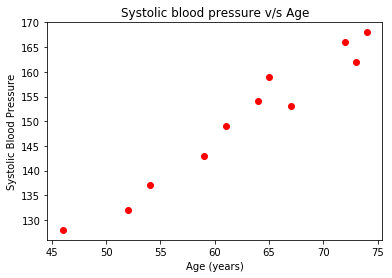

In [5]:
plt.scatter(X[:,1], X[:,0], c='r')
plt.title('Systolic blood pressure v/s Age')
plt.xlabel('Age (years)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

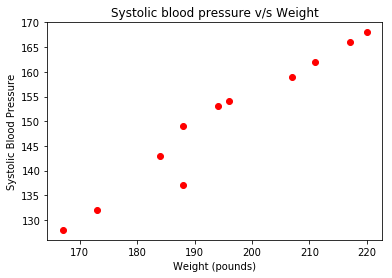

In [6]:
plt.scatter(X[:,2], X[:,0], c='r')
plt.title('Systolic blood pressure v/s Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

In [7]:
# we include a column of ones to act as bias
df['ones'] = 1

In [8]:
Y = df['X1']
X = df[['X2','X3','ones']]
X2_only = df[['X2', 'ones']]
X3_only = df[['X3', 'ones']]

### define a function to calculate the R-sqaured value

In [9]:
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Y_predicted = X.dot(w)
    
    d1 = Y - Y_predicted
    d2 = Y - Y.mean()
    r2 = 1 - (d1.dot(d1) / d2.dot(d2))
    return r2

In [10]:
print(f'R-squared for X2 only : {get_r2(X2_only, Y)}')

R-squared for X2 only : 0.9578407208147356


In [11]:
print(f'R-squared for X3 only : {get_r2(X3_only, Y)}')

R-squared for X3 only : 0.9419952085293065


In [12]:
print(f'R-squared for both X : {get_r2(X, Y)}')

R-squared for both X : 0.9768471041502091


### The R-sqaured value is maximum if both the parameters are included